In [1]:
import pandas as pd
df = pd.read_csv("Restaurant reviews.csv")
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [4]:
import pandas as pd
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming you've already imported the dataset and defined the DataFrame as 'df'

# Step 1: Handling Missing Values
# Check for missing values
print(df.isnull().sum())

# Step 2: Parsing Dates
df['Time'] = pd.to_datetime(df['Time'])

# Step 3: Text Cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert text to lowercase
        tokens = word_tokenize(text)  # Tokenize text
        filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        cleaned_text = ' '.join(filtered_tokens)
        return cleaned_text
    else:
        return ''  # Return empty string for NaN values

df['Cleaned_Review'] = df['Review'].apply(clean_text)

# Step 4: Extracting Features
df['Word_Count'] = df['Review'].apply(lambda x: len(str(x).split()))
# Additional feature extraction can be performed based on specific requirements.

# Step 5: Categorizing Ratings
# Convert 'Rating' column to numerical values
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Coerce errors to NaN for non-numeric values

def categorize_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Rating_Category'] = df['Rating'].apply(categorize_rating)

# Display the cleaned and processed dataframe
print(df.head())



Restaurant         0
Reviewer          38
Review            45
Rating            38
Metadata          38
Time              38
Pictures           0
Cleaned_Review     0
Word_Count         0
dtype: int64
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2

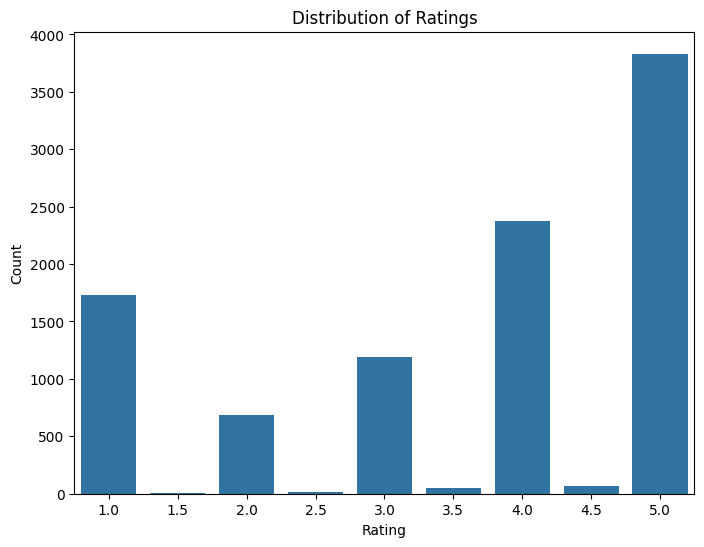

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


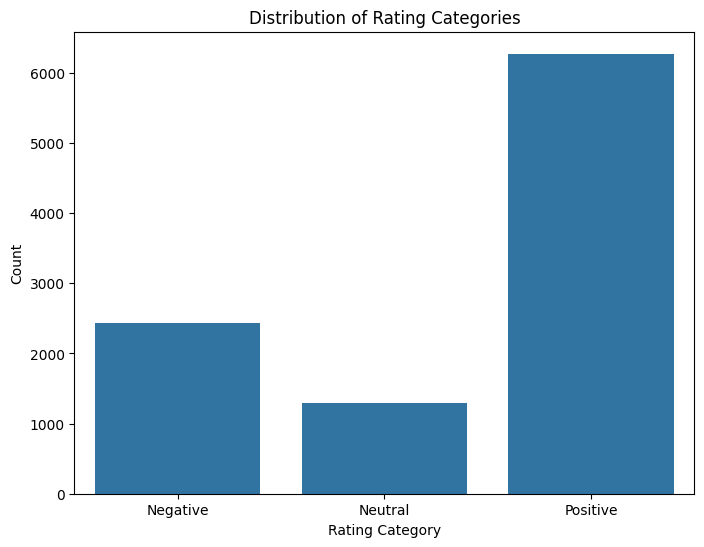

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating_Category', data=df, order=['Negative', 'Neutral', 'Positive'])
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()

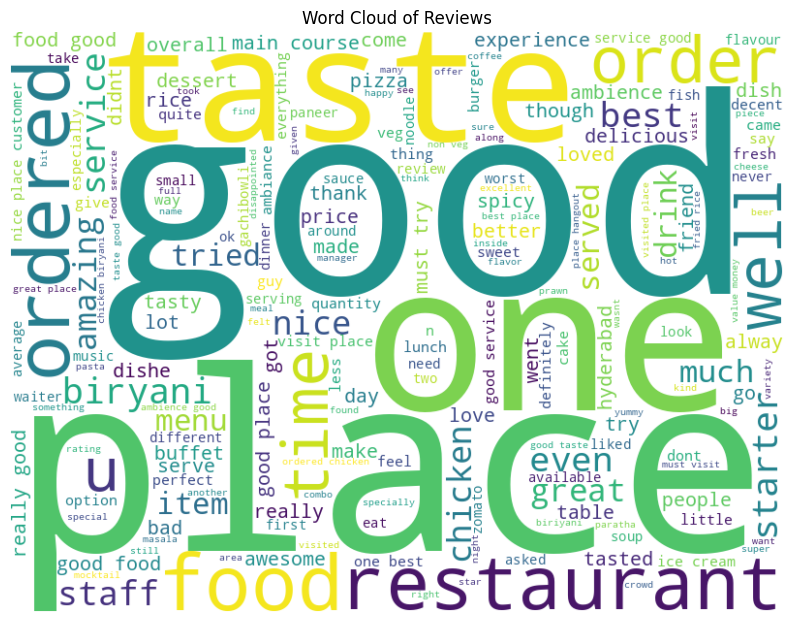

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews into a single string
all_reviews = ' '.join(df['Cleaned_Review'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()